In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import time
import random
import operator
import pickle
from copy import deepcopy

In [2]:
df = pd.read_csv('flightlist-november.csv') 

print(df)

        callsign number  icao24 registration typecode origin destination  \
0        TUP6928    NaN  424450          NaN      NaN    NaN        UUWW   
1         CSN399  CZ399  781795          NaN      NaN   YMML        KJFK   
2         ETH714    NaN  040101       ET-ASG     B788   KEWR        ESSA   
3          ZSALT    NaN  008142       ZS-ALT     B190    NaN        YPPH   
4         IRM112  W5112  7335a1       EP-MMA     A343   WMKK        LTBW   
...          ...    ...     ...          ...      ...    ...         ...   
1825010   NKS236  NK236  ac97e1       N910NK      NaN    NaN        KFLL   
1825011    AM333    NaN  7c6a57       VH-VAH     BE20   YMAV        YMEN   
1825012   N404AM    NaN  a4bb89       N404AM     B407    NaN        1IL4   
1825013   N383AK    NaN  a46679       N383AK      NaN   PAMR        PAMR   
1825014   EJA426  1I426  a51358       N426QS     GLF4   KALN        KSUS   

                         firstseen                   lastseen  \
0        2020-10-31 01

In [3]:
dfs = df

In [4]:
dfs = dfs.drop(['number', 'icao24', 'altitude_1', 'altitude_2'], axis=1)

In [5]:
dfs = dfs.dropna(subset=['registration', 'typecode', 'origin', 'destination', 'latitude_2', 'longitude_2'])

In [6]:
dfs = dfs[dfs["callsign"].str[:3]=="SIA"]

In [7]:
dfs.head()

,callsign,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,latitude_2,longitude_2
34,SIA377,9V-SMG,A359,LIMC,WSSS,2020-10-31 12:31:55+00:00,2020-11-01 00:48:28+00:00,2020-11-01 00:00:00+00:00,45.623749,8.735337,1.308929,103.960644
161,SIA26,9V-SMI,A359,WSSS,EDDF,2020-10-31 16:12:38+00:00,2020-11-01 04:36:47+00:00,2020-11-01 00:00:00+00:00,1.395721,103.997048,50.040572,8.549163
167,SIA324,9V-SMT,A359,WSSS,EHAM,2020-10-31 16:16:27+00:00,2020-11-01 04:55:17+00:00,2020-11-01 00:00:00+00:00,1.389542,103.994720,52.357628,4.711487
171,SIA283,9V-SMD,A359,WSSS,NZAA,2020-10-31 16:18:49+00:00,2020-11-01 01:19:01+00:00,2020-11-01 00:00:00+00:00,1.394240,103.996298,-36.991241,174.861496
267,SIA346,9V-SMH,A359,WSSS,LSZH,2020-10-31 17:42:04+00:00,2020-11-01 06:16:57+00:00,2020-11-01 00:00:00+00:00,1.392471,103.996251,47.478653,8.540771


In [8]:
dfs.registration.unique()
# dfs.origin.unique()

array(['9V-SMG', '9V-SMI', '9V-SMT', '9V-SMD', '9V-SMH', '9V-SFN',
       '9V-SMC', '9V-SFM', '9V-SMS', '9V-SFK', '9V-SML', '9V-SWQ',
       '9V-MGL', '9V-SMF', '9V-SFQ', '9V-SWE', '9V-SFI', '9V-SMO',
       '9V-SFP', '9V-SFO', '9V-SMQ', '9V-SMN', '9V-SMJ', '9V-SMM',
       '9V-SMB', '9V-SMP', '9V-SMA', '9V-SWY', '9V-SWR', '9V-SCB',
       '9V-SWP', '9V-SMK', '9V-MGI', '9V-SMR', '9V-SWM', '9V-SWH',
       '9V-SWO', '9V-MGF', '9V-SWS', '9V-SKU', '9V-SME', '9V-SWK',
       '9V-SWN'], dtype=object)

In [9]:
data = {'airport': [],
        'latitude': [],
        'longitude': []}

airports = pd.DataFrame(data)
print(airports)

Empty DataFrame
Columns: [airport, latitude, longitude]
Index: []


In [10]:
airports_data = dfs.origin.unique()
airports_another_data = dfs.destination.unique()

for i in airports_another_data:
    found = False
    for j in airports_data:
        if i == j:
            found = True
    if found == False:
        airports_data = np.append(airports_data, i)

In [11]:
print(airports_data)

['LIMC' 'WSSS' 'OMSJ' 'EGLL' 'YSSY' 'YMML' 'NZAA' 'KORD' 'WBSB' 'VOMM'
 'KDFW' 'EHAM' 'VHHH' 'EDDF' 'FAOR' 'YBBN' 'PANC' 'EBMB' 'WMKK' 'KLAX'
 'LSZH' 'NZCH' 'VOBL' 'ZUCK' 'VABB' 'LFPG' 'EKCH' 'VIDP' 'FARA' 'EBBR'
 'YPPH' 'LEBL' 'WSAC' 'VGZR' 'YSCB' 'RJAK' 'FAGM' 'LTBW' 'YTWB' 'YRED'
 'TS53' 'YPWH' 'RJAA' 'LTBA' 'FABB' 'VGTJ' '6AK5' 'WIDD']


In [12]:
for i in airports_data:
    if (np.isnan(dfs[dfs["origin"]==i]["latitude_1"].median())):
        latitude = dfs[dfs["destination"]==i]["latitude_2"].median()
        longitude = dfs[dfs["destination"]==i]["longitude_2"].median()
        
    elif (np.isnan(dfs[dfs["destination"]==i]["latitude_2"].median())):
        latitude = dfs[dfs["origin"]==i]["latitude_1"].median()
        longitude = dfs[dfs["origin"]==i]["longitude_1"].median()
        
    else:
        latitude = (dfs[dfs["origin"]==i]["latitude_1"].median() + dfs[dfs["destination"]==i]["latitude_2"].median())/2
        longitude = (dfs[dfs["origin"]==i]["longitude_1"].median() + dfs[dfs["destination"]==i]["longitude_2"].median())/2
        
    airport = {'airport': i, 'latitude': latitude, 'longitude': longitude}
    airports = airports.append(airport, ignore_index=True)

print(airports)

   airport   latitude   longitude
0     LIMC  45.622997    8.729880
1     WSSS   1.349354  103.991831
2     OMSJ  25.333187   55.513881
3     EGLL  51.464928   -0.451351
4     YSSY -33.937398  151.173686
5     YMML -37.659397  144.836085
6     NZAA -37.007307  174.802684
7     KORD  41.967407  -87.905482
8     WBSB   4.943314  114.927863
9     VOMM  12.988395   80.164536
10    KDFW  32.904827  -97.050797
11    EHAM  52.329506    4.733640
12    VHHH  22.306459  113.907723
13    EDDF  50.045047    8.569396
14    FAOR -26.110302   28.248013
15    YBBN -27.383320  153.122108
16    PANC  61.179126 -150.017751
17    EBMB  50.909637    4.492666
18    WMKK   2.714566  101.717297
19    KLAX  33.936884 -118.397799
20    LSZH  47.467043    8.551562
21    NZCH -43.486825  172.534596
22    VOBL  13.189594   77.703107
23    ZUCK  29.778076  106.693145
24    VABB  19.088734   72.868544
25    LFPG  48.996591    2.563600
26    EKCH  55.612789   12.641687
27    VIDP  28.559853   77.113512
28    FARA -26

In [13]:
e_asia = ["VOMM", "VHHH", "VOBL", "ZUCK", "VABB", "VIDP", "VGZR", "RJAK", "RJAA", "VGTJ"]
americas = ["KORD", "KDFW", "PANC", "KLAX", "TS53", "6AK5"]
europe = ["LIMC", "EGLL", "EHAM", "EDDF", "EBMB", "LSZH", "LFPG", "EKCH", "FARA", "EBBR", "LEBL"]
sw_pasific = ["WSSS", "YSSY", "YMML", "NZAA", "WBSB", "YBBN", "WMKK", "NZCH", "YPPH", "WSAC", "YSCB", "YTWB", "YRED", "YPWH", "WIDD"]
w_asia_africa = ["OMSJ", "FAOR", "FAGM", "LTBW", "LTBA", "FABB"]

In [14]:
region = []
load_rate = []
for i in range(len(airports)):
    for j in range(len(e_asia)):
        if(airports["airport"].iloc[i]==e_asia[j]):
            region.append("East Asia")
            load_rate.append(0.128)
            break
    for k in range(len(americas)):
        if(airports["airport"].iloc[i]==americas[k]):
            region.append("Americas")
            load_rate.append(0.113)
            break
    for l in range(len(europe)):
        if(airports["airport"].iloc[i]==europe[l]):
            region.append("Europe")
            load_rate.append(0.133)
            break
    for m in range(len(sw_pasific)):
        if(airports["airport"].iloc[i]==sw_pasific[m]):
            region.append("South West Pacific")
            load_rate.append(0.171)
            break
    for n in range(len(w_asia_africa)):
        if(airports["airport"].iloc[i]==w_asia_africa[n]):
            region.append("West Asia and Africa")
            load_rate.append(0.140)
            break
            
print(region)

['Europe', 'South West Pacific', 'West Asia and Africa', 'Europe', 'South West Pacific', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'Americas', 'Europe', 'East Asia', 'Europe', 'West Asia and Africa', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'East Asia', 'East Asia', 'East Asia', 'Europe', 'Europe', 'East Asia', 'Europe', 'Europe', 'South West Pacific', 'Europe', 'South West Pacific', 'East Asia', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'East Asia', 'Americas', 'South West Pacific']


In [15]:
airports['region'] = region
airports['load_rate'] = load_rate
print(airports)

   airport   latitude   longitude                region  load_rate
0     LIMC  45.622997    8.729880                Europe      0.133
1     WSSS   1.349354  103.991831    South West Pacific      0.171
2     OMSJ  25.333187   55.513881  West Asia and Africa      0.140
3     EGLL  51.464928   -0.451351                Europe      0.133
4     YSSY -33.937398  151.173686    South West Pacific      0.171
5     YMML -37.659397  144.836085    South West Pacific      0.171
6     NZAA -37.007307  174.802684    South West Pacific      0.171
7     KORD  41.967407  -87.905482              Americas      0.113
8     WBSB   4.943314  114.927863    South West Pacific      0.171
9     VOMM  12.988395   80.164536             East Asia      0.128
10    KDFW  32.904827  -97.050797              Americas      0.113
11    EHAM  52.329506    4.733640                Europe      0.133
12    VHHH  22.306459  113.907723             East Asia      0.128
13    EDDF  50.045047    8.569396                Europe      0

In [16]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6378.1 #earth radius in km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [17]:
airport_dist = []

# print(len(airports))
# print(airports["latitude"].iloc[1])
for i in range(len(airports)):
    row = []
    for j in range(len(airports)):
        dist = haversine(airports["latitude"].iloc[i], airports["longitude"].iloc[i], airports["latitude"].iloc[j], airports["longitude"].iloc[j])
        row.append(dist)
    airport_dist.append(row)
    
print(airport_dist)
    

[[0.0, 10320.430258215578, 4717.841781312695, 937.1660268519785, 16609.560128529316, 16328.954466590929, 18532.59680591183, 7269.0678188569245, 10868.089507810684, 7548.95074633125, 8547.656137571441, 801.3169185796232, 9367.72272863323, 492.40317589072635, 8226.20896899483, 16305.371451274925, 7994.969157835845, 666.7552359065804, 10035.00646673157, 9707.300556374426, 205.7303869886589, 18733.26757149963, 7342.358008596109, 8269.138067898637, 6515.603799301376, 597.7053144643955, 1145.392331724757, 6165.855188281992, 8219.648382286154, 665.8771017492281, 13763.71195323607, 714.7633108335267, 10321.464585191243, 7525.8491042544, 16538.803322184736, 9739.086961262197, 8236.528918768696, 1684.8073009086406, 16240.840339895418, 16299.853550010886, 8549.282279244859, 16231.958278267468, 9772.276447147076, 1706.5289191728648, 8237.618885773374, 7530.724450895547, 7997.137643355396, 10343.682712043537], [10320.430258215578, 0.0, 5841.7632385838115, 10894.76051264912, 6299.836779033911, 6038.

In [18]:
dfs['day'].value_counts()

2020-11-28 00:00:00+00:00    40
2020-11-15 00:00:00+00:00    38
2020-11-25 00:00:00+00:00    38
2020-11-16 00:00:00+00:00    37
2020-11-29 00:00:00+00:00    37
2020-11-22 00:00:00+00:00    37
2020-11-21 00:00:00+00:00    37
2020-11-18 00:00:00+00:00    37
2020-11-23 00:00:00+00:00    36
2020-11-20 00:00:00+00:00    36
2020-11-04 00:00:00+00:00    35
2020-11-09 00:00:00+00:00    35
2020-11-14 00:00:00+00:00    35
2020-11-19 00:00:00+00:00    34
2020-11-01 00:00:00+00:00    34
2020-11-13 00:00:00+00:00    34
2020-11-11 00:00:00+00:00    34
2020-11-30 00:00:00+00:00    34
2020-11-02 00:00:00+00:00    33
2020-11-08 00:00:00+00:00    33
2020-11-07 00:00:00+00:00    33
2020-11-26 00:00:00+00:00    33
2020-11-27 00:00:00+00:00    33
2020-11-12 00:00:00+00:00    32
2020-11-06 00:00:00+00:00    32
2020-11-05 00:00:00+00:00    32
2020-11-17 00:00:00+00:00    30
2020-11-10 00:00:00+00:00    28
2020-11-03 00:00:00+00:00    27
2020-11-24 00:00:00+00:00    26
Name: day, dtype: int64

In [19]:
# dfs[dfs["day"].isin({day, day_after})]

In [20]:
day = "2020-11-21 00:00:00+00:00"
# day_after = "2020-11-30 00:00:00+00:00"
day_after = "2020-11-30 00:00:00+00:00"
day_before = "2020-11-20 00:00:00+00:00"
# dfx = dfs[dfs["day"]==day]
# dfx = dfs[dfs["day"].isin({day, day_after})]
# dfx = dfs[dfs["day"].isin({day, day_after})]
dfx = dfs[(dfs["day"] >= day) & (dfs["day"] <= day_after)]
dfy = dfs[dfs["day"]<day]
dfx = dfx[:100]

In [21]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
...          ...          ...      ...    ...         ...   
1375418  SIA8879       9V-SWS     B77W   WSSS        WSSS   
1378407  SIA7381       9V-SFQ     B744   KLAX        EHAM   
1380995   SIA323       9V-SMM     A359   EHAM        WSSS   
1381034   SIA345       9V-SML     A359   LSZH        WSSS   
1381044   SIA335       9V-SMJ     A359   LFPG        WSSS   

                         firstseen                   lastseen  \
1208410  2020-11-20 16:06:59+00:00  2020-11-21 05:40:59+00:00   
1208521  2020-11-20 16:08:35+00:00  2020-11-21 05:29:37+00:00   
1208877  2020-11-20 16:13:20+00:00  2020-11-21 05:09:18+00:00   
1211170

In [22]:
data = {'airplane': [],
        'type': [],
        'curr_loc': [],
        'last_seen': [],
        'capacity': [],
        'fixed_cost': [],
        'min_cost': [],
        'idle_cost': []}

airplanes = pd.DataFrame(data)
print(airplanes)

Empty DataFrame
Columns: [airplane, type, curr_loc, last_seen, capacity, fixed_cost, min_cost, idle_cost]
Index: []


In [23]:
airplanes_data = dfs.registration.unique()
print(airplanes_data)

['9V-SMG' '9V-SMI' '9V-SMT' '9V-SMD' '9V-SMH' '9V-SFN' '9V-SMC' '9V-SFM'
 '9V-SMS' '9V-SFK' '9V-SML' '9V-SWQ' '9V-MGL' '9V-SMF' '9V-SFQ' '9V-SWE'
 '9V-SFI' '9V-SMO' '9V-SFP' '9V-SFO' '9V-SMQ' '9V-SMN' '9V-SMJ' '9V-SMM'
 '9V-SMB' '9V-SMP' '9V-SMA' '9V-SWY' '9V-SWR' '9V-SCB' '9V-SWP' '9V-SMK'
 '9V-MGI' '9V-SMR' '9V-SWM' '9V-SWH' '9V-SWO' '9V-MGF' '9V-SWS' '9V-SKU'
 '9V-SME' '9V-SWK' '9V-SWN']


In [24]:
airplanes_capacity = []
airplanes_fixedcost = []
airplanes_idlecost = []
airplanes_minutecost = []

for i in range(len(airplanes_data)):
    for j in range(len(dfs)):
        if(dfs["registration"].iloc[j]==airplanes_data[i]):
            if(dfs["typecode"].iloc[j]=="A359"):
                capacity = 350
                min_cost = 244
                fixed_cost = 946.069
                idle_min_cost = 195
            elif(dfs["typecode"].iloc[j]=="B744"):
                capacity = 416
                min_cost = 321
                fixed_cost = 851.244
                idle_min_cost = 257
            elif(dfs["typecode"].iloc[j]=="B77W"):
                capacity = 264
                min_cost = 194
                fixed_cost = 969.244
                idle_min_cost = 155
            elif(dfs["typecode"].iloc[j]=="B738"):
                capacity = 215
                min_cost = 116
                fixed_cost = 732.745
                idle_min_cost = 92
            elif(dfs["typecode"].iloc[j]=="B78X"):
                capacity = 337
                min_cost = 187
                fixed_cost = 1001.250
                idle_min_cost = 150
            elif(dfs["typecode"].iloc[j]=="A388"):
                capacity = 471
                min_cost = 433
                fixed_cost = 638.418
                idle_min_cost = 347
            airplanes_capacity.append(int(capacity))
            airplanes_fixedcost.append(int(fixed_cost))
            airplanes_idlecost.append(int(idle_min_cost))
            airplanes_minutecost.append(int(min_cost))
            break

print(airplanes_capacity)

[350, 350, 350, 350, 350, 416, 350, 416, 350, 416, 350, 264, 215, 350, 416, 264, 416, 350, 416, 416, 350, 350, 350, 350, 350, 350, 350, 264, 264, 337, 264, 350, 215, 350, 264, 264, 264, 215, 264, 471, 350, 264, 264]


In [25]:
no_airplane = 0
for i in airplanes_data:
    for j in range(len(dfx)):
        if(dfx["registration"].iloc[j]==i):
            airplane = {'airplane': i,
                        'type': dfx["typecode"].iloc[j],
                        'curr_loc': dfx["origin"].iloc[j],
                        'last_seen': dfx["firstseen"].iloc[j],
                        'capacity': airplanes_capacity[no_airplane],
                        'fixed_cost': airplanes_fixedcost[no_airplane],
                        'min_cost': airplanes_minutecost[no_airplane],
                        'idle_cost': airplanes_idlecost[no_airplane]}
            
            airplanes = airplanes.append(airplane, ignore_index=True)
            break
        elif((j==(len(dfx)-1)) and (dfx["registration"].iloc[j]!=i)):
            for k in range(len(dfy)):
                if((k!=0) and (dfy["registration"].iloc[-k]==i)):
                    airplane = {'airplane': i,
                                'type': dfy["typecode"].iloc[-k],
                                'curr_loc': dfy["destination"].iloc[-k],
                                'last_seen': dfy["firstseen"].iloc[-k],
                                'capacity': airplanes_capacity[no_airplane],
                                'fixed_cost': airplanes_fixedcost[no_airplane],
                                'min_cost': airplanes_minutecost[no_airplane],
                                'idle_cost': airplanes_idlecost[no_airplane]}
                    
                    airplanes = airplanes.append(airplane, ignore_index=True)
                    break
                elif((k==(len(dfy)-1)) and (dfy["registration"].iloc[-k]!=i)):
                    for l in range(len(dfs)):
                        if((l!=0) and (dfs["registration"].iloc[-l]==i)):
                            airplane = {'airplane': i,
                                        'type': dfs["typecode"].iloc[-l],
                                        'curr_loc': "WSSS",
                                        'last_seen': day_before,
                                        'capacity': airplanes_capacity[no_airplane],
                                        'fixed_cost': airplanes_fixedcost[no_airplane],
                                        'min_cost': airplanes_minutecost[no_airplane],
                                        'idle_cost': airplanes_idlecost[no_airplane]}
                            airplanes = airplanes.append(airplane, ignore_index=True)
                            break
                            
    no_airplane = no_airplane + 1
    
print(airplanes)

   airplane  type curr_loc                  last_seen  capacity  fixed_cost  \
0    9V-SMG  A359     LSZH  2020-11-21 13:12:36+00:00     350.0       946.0   
1    9V-SMI  A359     WSSS  2020-11-20 17:54:12+00:00     350.0       946.0   
2    9V-SMT  A359     WSSS  2020-11-22 02:15:05+00:00     350.0       946.0   
3    9V-SMD  A359     NZCH  2020-11-20 22:51:25+00:00     350.0       946.0   
4    9V-SMH  A359     LFPG  2020-11-21 10:03:18+00:00     350.0       946.0   
5    9V-SFN  B744     WSSS  2020-11-21 03:07:03+00:00     416.0       851.0   
6    9V-SMC  A359     WSSS  2020-11-23 00:43:50+00:00     350.0       946.0   
7    9V-SFM  B744     WSSS  2020-11-20 22:21:21+00:00     416.0       851.0   
8    9V-SMS  A359     WSSS  2020-11-21 16:05:15+00:00     350.0       946.0   
9    9V-SFK  B744     WSSS  2020-11-22 06:01:20+00:00     416.0       851.0   
10   9V-SML  A359     WSSS  2020-11-21 01:12:22+00:00     350.0       946.0   
11   9V-SWQ  B77W     WSSS  2020-11-18 17:03:08+00:0

In [26]:
max_delay = 180 #minute
min_safe = 30 #minute
max_arrival = max_delay - min_safe

def createSchedule():
    created = False
    while(created==False):
        airplanes_temp = airplanes.copy()
        schedule = []
        wakeup = time.time() + 10
        for i in range(len(dfx)):
            flight = [i]

            found = False
            while (found == False):
                id_airplane = random.randint(0, len(airplanes)-1)
                if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i])+ datetime.timedelta(minutes=max_arrival)) and airplanes_temp["curr_loc"].iloc[id_airplane]==dfx["origin"].iloc[i]):
                    found = True
                else:
                    if (time.time() > wakeup):
                        break       

            airplanes_temp["curr_loc"].iloc[id_airplane]=dfx["destination"].iloc[i]

            if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i]) - datetime.timedelta(minutes=min_safe))):
                departure = pd.to_datetime(dfx["firstseen"].iloc[i])
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival
            else:
                departure = pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) + datetime.timedelta(minutes=min_safe)
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival

            for j in range(len(airports)):
                if(airports["airport"].iloc[j]==dfx["destination"].iloc[i]):
                    load_rate = airports["load_rate"].iloc[j]
                    break     

            passenger = round(airplanes_temp["capacity"].iloc[id_airplane] * load_rate)

            flight.extend([id_airplane, departure, arrival, passenger, load_rate])
            schedule.append(flight)
        if(len(dfx)==len(schedule)):
            created = True
    
    return schedule

In [27]:
def createOriginalSchedule():
    schedule = []
    for i in range(len(dfx)):
        flight=[i]
        for j in range(len(airplanes)):
            if(airplanes["airplane"].iloc[j]==dfx["registration"].iloc[i]):
                break
        flight.append(j)
        flight.append(pd.to_datetime(dfx["firstseen"].iloc[i]))
        flight.append(pd.to_datetime(dfx["lastseen"].iloc[i]))
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                break
        flight.append(round(airplanes["capacity"].iloc[j] * airports["load_rate"].iloc[k]))
        flight.append(airports["load_rate"].iloc[k])
        
        schedule.append(flight)
        
    return schedule
        

In [28]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countOriginalFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946.069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851.244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969.244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732.745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001.250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638.418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
#     
#     fitness_val = (((passenger-0)/(4270-0)*1000)-((cost-0)/(50898241-0)*1000))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [29]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countAirplaneFitness(schedule, airplane_id):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_used = False
    idle_sec = 0
    idle_min_cost = 0
    fixed_cost = 0
    id = airplane_id
    for i in range(len(schedule)):
        if(schedule[i][1]==id):
            if(airplanes["type"].iloc[id]=="A359"):
                min_cost = 244
            elif(airplanes["type"].iloc[id]=="B744"):
                min_cost = 321
            elif(airplanes["type"].iloc[id]=="B77W"):
                min_cost = 194
            elif(airplanes["type"].iloc[id]=="B738"):
                min_cost = 116
            elif(airplanes["type"].iloc[id]=="B78X"):
                min_cost = 187
            elif(airplanes["type"].iloc[id]=="A388"):
                min_cost = 433
            cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
            passenger = passenger + schedule[i][4]
            profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
            
            for k in range(len(airports)):
                if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                    origin_id = k
                if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                    destination_id = k

            cost = cost + airport_dist[origin_id][destination_id]
        
    first_flight = pd.to_datetime(airplanes["last_seen"].iloc[id])
    last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])

    for k in range(len(schedule)):
        if(schedule[k][1]==id):
            if(plane_used==False):
                plane_used = True
                lastflight_pos = k
                idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
            else:
                idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                lastflight_pos = k

    if(plane_used==False):
        idle_sec = idle_sec + (last_flight - first_flight).seconds
        fixed_cost = 0
    else:
        idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
        if(airplanes["type"].iloc[id]=="A359"):
            fixed_cost = 946.069
        elif(airplanes["type"].iloc[id]=="B744"):
            fixed_cost = 851.244
        elif(airplanes["type"].iloc[id]=="B77W"):
            fixed_cost = 969.244
        elif(airplanes["type"].iloc[id]=="B738"):
            fixed_cost = 732.745
        elif(airplanes["type"].iloc[id]=="B78X"):
            fixed_cost = 1001.250
        elif(airplanes["type"].iloc[id]=="A388"):
            fixed_cost = 638.418

    if(airplanes["type"].iloc[id]=="A359"):
        idle_min_cost = 195
    elif(airplanes["type"].iloc[id]=="B744"):
        idle_min_cost = 257
    elif(airplanes["type"].iloc[id]=="B77W"):
        idle_min_cost = 155
    elif(airplanes["type"].iloc[id]=="B738"):
        idle_min_cost = 92
    elif(airplanes["type"].iloc[id]=="B78X"):
        idle_min_cost = 150
    elif(airplanes["type"].iloc[id]=="A388"):
        idle_min_cost = 347

    cost = cost + round(idle_sec/60)*idle_min_cost
    cost = cost + fixed_cost
    
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
#     fitness_val = (((passenger-0)/(originalFitness[1]-0)*(2*originalFitness[1]))-((cost-0)/(originalFitness[2]-0)*originalFitness[1]))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(round(cost))
    
    return fitness

In [30]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946.069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851.244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969.244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732.745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001.250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638.418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
        
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
#     fitness_val = (((passenger-0)/(originalFitness[1]-0)*(2*originalFitness[1]))-((cost-0)/(originalFitness[2]-0)*originalFitness[1]))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(round(cost))
    fitness.append(plane_count)
    
    return fitness

In [31]:
def elite(population):
    curr_elite = 0
    for i in range(len(population)):
        if(population[i][0] > population[curr_elite][0]):
            curr_elite = i
    return curr_elite

In [32]:
def roulleteWheel(population):
    sump = 0
    sumpart = 0
    worst = 0
    
    for k in range(len(population)):
#         print("worst", population[worst][0])
        if(population[k][0] < population[worst][0]):
            worst = k 
    
    for i in range(len(population)):
        if(population[worst][0] < 0):
            sump = sump + population[i][0] - population[worst][0]
        else:
            sump = sump + population[i][0]
#         print("sump", sump)
    
    rand = random.uniform(0, sump)
#     print("Random", rand)
    
    for j in range(len(population)):
        if(population[worst][0] < 0):
            sumpart = sumpart + population[j][0] - population[worst][0]
        else:
            sumpart = sumpart + population[j][0]
#         print("sumpart", sumpart)
        if(sumpart > rand):
            break
    
    return j

In [33]:
def swapPlane(flight1, flight2):
    newflight1 = []
    newflight2 = []
    result = []

#     print(flight1[1])
#     print(flight2[1])
    
    newflight1.append(flight1[0])
    newflight2.append(flight2[0])
    
    newflight1.append(flight2[1])
    newflight2.append(flight1[1])
    
#     print(newflight1[1])
#     print(newflight2[1])
    
    newflight1.append(flight2[2])
    newflight2.append(flight1[2])

    newflight1.append(flight1[2] + (flight2[3] - flight2[2]))
    newflight2.append(flight2[2] + (flight1[3] - flight1[2]))
    
    newflight1.append(round(airplanes["capacity"].iloc[flight1[1]] * flight2[5]))
    newflight2.append(round(airplanes["capacity"].iloc[flight2[1]] * flight1[5]))
    
    newflight1.append(flight1[5])
    newflight2.append(flight2[5])
    
    result = [newflight1, newflight2]
    return result

In [34]:
def rao3(solutions, rand_solution, best_solution, worst_solution):
    start_solution = deepcopy(solutions)
    state = 1
    while (state == 1):
        rao3_done = False
        while (rao3_done == False):
#             print(1)
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1) 
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)
     
            if(len(available_airplanes) >= 3):
                rao3_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for variable in variables:
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xrandsolution = airplanes[variable].iloc[rand_solution[rand_flight][1]]
                    xbests = airplanes[variable].iloc[best_solution[rand_flight][1]]
                    xworst = airplanes[variable].iloc[worst_solution[rand_flight][1]]

                    if(countFitness(solution)[0] > countFitness(rand_solution)[0]):
                        or1 = xsolution
                        or2 = xrandsolution
                    else:
                        or1 = xrandsolution
                        or2 = xsolution

                    xsolution = xsolution + (random.random()*(xbests- abs(xworst))) + (random.random()*(abs(or1) - abs(or2)))
                    if(variable=="capacity"):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    rao3_solution.append(xsolution)
                rao3_solution = np.array(rao3_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(rao3_solution - airplane_solution)    

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                        
                rao3_done = True
                if(rao3_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
#         state = random.randint(0,1)
        
    return new_solution 

In [35]:
def crossover(besthqs, xbest):
    start_solution = deepcopy(besthqs)
    state = 1
    while (state == 1):
        crossover_done = False
        while (crossover_done == False):
            solution = deepcopy(start_solution)
            best_solution = deepcopy(xbest)
            rand_flight = random.randint(0, len(solution)-1) 
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist1 = []
            airplanelist2 = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist1.append(airplane)
                airplanelist2.append(airplane)
            for j in range(rand_flight):
                airplanelist1[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist1[solution[j][1]][2] = solution[j][3]
                airplanelist2[best_solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist2[best_solution[j][1]][2] = best_solution[j][3]

            available_airplanes1 = []
            available_airplanes2 = []
            for airplane in airplanelist1:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes1.append(airplane)
            for airplane in airplanelist2:        
                if (airplane[0] != best_solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes2.append(airplane)    

            if(len(available_airplanes1) >= 3 and len(available_airplanes2) >= 3):
                crossover_solution1 = []
                crossover_solution2 = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for variable in variables:
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xbests = airplanes[variable].iloc[best_solution[rand_flight][1]]

                    r = random.random()
                    while (r==0.5):
                        r = random.random()
                    xsolution1 = r*xsolution + (1-r)*xbests
                    xsolution2 = r*xbests + (1-r)*xsolution
                    
                    if(variable=="capacity"):
                        xsolution1 = xsolution1*2.428*flight_len
                        xsolution2 = xsolution2*2.428*flight_len
                    else:
                        xsolution1 = xsolution1*flight_len
                        xsolution2 = xsolution2*flight_len
                    crossover_solution1.append(xsolution1)
                    crossover_solution2.append(xsolution2)
                crossover_solution1 = np.array(crossover_solution1)
                crossover_solution2 = np.array(crossover_solution2)

                for airplane in available_airplanes1:
                    airplane_solution1 = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution1.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution1.append(airplane[i+4]*flight_len)
                    airplane_solution1 = np.array(airplane_solution1)
                    airplane[-1] = np.linalg.norm(crossover_solution1 - airplane_solution1)
                    
                for airplane in available_airplanes2:
                    airplane_solution2 = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution2.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution2.append(airplane[i+4]*flight_len)
                    airplane_solution2 = np.array(airplane_solution2)
                    airplane[-1] = np.linalg.norm(crossover_solution2 - airplane_solution2)
                    

                new_solution1 = []
                available_airplanes1 = sorted(available_airplanes1,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes1[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution1.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution1[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution1[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution1[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution1[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution1[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution1[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution1.append(newflight)

                new_solution2 = []
                available_airplanes2 = sorted(available_airplanes2,key=lambda l:l[7], reverse=True)
                airplane1 = best_solution[rand_flight][1]
                airplane2 = available_airplanes2[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(best_solution)):
                    if(l < rand_flight):
                        new_solution2.append(best_solution[l])
                        if(best_solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(best_solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = best_solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(best_solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution2[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution2[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution2[last_pos2][3] + (best_solution[l][3]-best_solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(best_solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution2[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution2[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution2[last_pos1][3] + (best_solution[l][3]-best_solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution2.append(newflight)

                crossover_done = True
                if(crossover_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution1)
                    
#         state = random.randint(0,1)
        
    return new_solution1, new_solution2

In [36]:
def mutation(xbest, var_a, var_b):
#     xbest = deepcopy(xbests)
    start_solution = deepcopy(xbest)
    state = 1
    while (state == 1):
        mutation_done = False
        if(random.random() >= var_b):
            mutation_done = True
            new_solution = start_solution
        while (mutation_done == False):
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1)
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)

            if(len(available_airplanes) >= 3):
                mutation_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                index = 4
                for variable in variables:
                    airplanelist = sorted(airplanelist,key=lambda l:l[index], reverse=True)
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]               
                    uppervar =  airplanelist[0][index]
                    lowervar =  airplanelist[-1][index]
                    xsolution = xsolution + (2*random.random()-1) * var_a*abs(uppervar - lowervar)
                    index = index + 1
                    if(index==5):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    mutation_solution.append(xsolution)
                mutation_solution = np.array(mutation_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(mutation_solution - airplane_solution)
            

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                mutation_done = True
                if(mutation_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
                
#         state = random.randint(0,1)
                
    return new_solution 

In [37]:
def randomwalk(solutions, rand_solution):
    start_solution = deepcopy(solutions)
    state = 1
    while (state == 1):
        randomwalk_done = False
        while (randomwalk_done == False):
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1)
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)

            if(len(available_airplanes) >= 3):
                randomwalk_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for selected_var in range(4):
                    variable = variables[selected_var]
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xrandsolution = airplanes[variable].iloc[rand_solution[rand_flight][1]]

                    xsolution = xsolution + (random.random()*(xrandsolution - xsolution))
                    if(i==0):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    randomwalk_solution.append(xsolution)
                randomwalk_solution = np.array(randomwalk_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(randomwalk_solution - airplane_solution)

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                randomwalk_done = True
                if(randomwalk_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
                    
#         state = random.randint(0,1)

    return new_solution 

In [38]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
...          ...          ...      ...    ...         ...   
1375418  SIA8879       9V-SWS     B77W   WSSS        WSSS   
1378407  SIA7381       9V-SFQ     B744   KLAX        EHAM   
1380995   SIA323       9V-SMM     A359   EHAM        WSSS   
1381034   SIA345       9V-SML     A359   LSZH        WSSS   
1381044   SIA335       9V-SMJ     A359   LFPG        WSSS   

                         firstseen                   lastseen  \
1208410  2020-11-20 16:06:59+00:00  2020-11-21 05:40:59+00:00   
1208521  2020-11-20 16:08:35+00:00  2020-11-21 05:29:37+00:00   
1208877  2020-11-20 16:13:20+00:00  2020-11-21 05:09:18+00:00   
1211170

In [39]:
test = createSchedule()

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [40]:
print(test)

[[0, 15, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 35, 0.133], [1, 24, Timestamp('2020-11-20 16:43:20+0000', tz='UTC'), Timestamp('2020-11-21 06:04:22+0000', tz='UTC'), 47, 0.133], [2, 20, Timestamp('2020-11-20 16:36:59+0000', tz='UTC'), Timestamp('2020-11-21 05:32:57+0000', tz='UTC'), 47, 0.133], [3, 35, Timestamp('2020-11-20 18:27:55+0000', tz='UTC'), Timestamp('2020-11-21 06:57:55+0000', tz='UTC'), 35, 0.133], [4, 32, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 30, 0.14], [5, 42, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 45, 0.171], [6, 21, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 60, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'),

In [41]:
def era():
    print("Starting...")
    p = 40
    s = 0.5
    a = 0.5
    b = 0.9
    iteration = 1000
    y_plot_list = []
    x_plot_list = []
    var_s_plot_list = []
    var_a_plot_list = []
    var_b_plot_list = []
    xbest = []
    xworst = []
    besthq = []
    f1 = 0
    f2 = 0
    f3 = 0
    
    print("Creating Solution...")
       
    with open('solution/solution_100-1', 'rb') as fp:
        initial_solutions1 = pickle.load(fp)
    with open('solution/solution_100-2', 'rb') as fp:
        initial_solutions2 = pickle.load(fp)
    initial_solutions =  initial_solutions1 + initial_solutions2
    
#     solutions = deepcopy(initial_solutions)
    solutions = []
    
    for i in range(len(initial_solutions)):
        fitness = countFitness(initial_solutions[i])[0]
        sol_fit = [initial_solutions[i], fitness]
        solutions.append(sol_fit)
        
    
    for i in range(iteration):
        print("Iterasi ke-", i)
        for solution in solutions:
            solution[1] = countFitness(solution[0])[0]
            
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)              
        
        if(i==0):
            f2 = countFitness(solutions[0][0])[0]
            f3 = countFitness(solutions[0][0])[0]
            xbest = deepcopy(solutions[0])
            xworst = deepcopy(solutions[-1])
        else:
            f3 = f2
            f2 = f1
            if(solutions[0][1] > xbest[1]):
                xbest = deepcopy(solutions[0])
            if(solutions[-1][1] > xworst[1]):
                xworst = deepcopy(solutions[-1])
        
        if ((round(s*p)) < 5):
            hq = solutions[:5]
            lq = solutions[5:]
        else:
            hq = solutions[:(round(s*p))]
            lq = solutions[(round(s*p)):]       
        
        print("Rao3 High-Quality solution...")
        for hq_indv in hq:
            
            random_hq = random.randint(0, len(hq)-1)
            while hq_indv==hq[random_hq]:
                random_hq = random.randint(0, len(hq)-1)
            newhq_indv = [rao3(hq_indv[0], hq[random_hq][0], xbest[0], xworst[0])]  
            newhq_indv.append(countFitness(newhq_indv[0])[0])
            
            if(countFitness(newhq_indv[0])[0] > countFitness(hq_indv[0])[0]):
                hq_indv[0] = deepcopy(newhq_indv[0])
                hq_indv[1] = deepcopy(newhq_indv[1])
        
        hq = sorted(hq,key=lambda l:l[1], reverse=True)
        
#         print(hq)
        
        besthq = hq[0]
        
        if(random.random() > 0.5):
            print("Solution Crossover...")
            o1, o2 = crossover(besthq[0], xbest[0])
            if(countFitness(o1)[0] > countFitness(besthq[0])[0]):
#                 print("o1",countFitness(o1)[0])
                offsol1 = [o1, countFitness(o1)[0]]
                hq[0] =  offsol1
                
            if(countFitness(o2)[0] > xbest[1]):
#                 print("o2",countFitness(o2)[0])
                offsol2 = [o2, countFitness(o2)[0]]
                xbest = deepcopy(offsol2)
        else:
            print("Solution Mutation...")
            o = mutation(xbest[0], a, b)
            if(countFitness(o)[0] > xbest[1]):
#                 print("o",countFitness(o)[0])
                offsol = [o, countFitness(o)[0]]
                xbest = deepcopy(offsol)
        
        print("Random Walk Low-Quality Solution...")
        for lq_indv in lq:
            
            random_hq = random.randint(0, len(hq)-1)
            newlq_indv = [randomwalk(lq_indv[0], hq[random_hq][0])]  
            newlq_indv.append(countFitness(newlq_indv[0])[0])
            
            if(countFitness(newlq_indv[0])[0] > countFitness(lq_indv[0])[0]):
                lq_indv[0] = deepcopy(newlq_indv[0])
                lq_indv[1] = deepcopy(newlq_indv[1])
            
        
        solutions = hq+lq
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)
        if ((round(s*p)) < 5):
            hq = solutions[:5]
            lq = solutions[5:]
        else:
            hq = solutions[:(round(s*p))]
            lq = solutions[(round(s*p)):]
        
        if(solutions[0][1] > xbest[1]):
            xbest = deepcopy(solutions[0])
       
        f1 = countFitness(xbest[0])[0]
        diff1 = abs(f1-f2)/f1
        diff2 = abs(f2-f3)/f2       
        
        if(diff1 > 0 and diff2 > 0):
            s = s * (1+((diff1 + diff2)/2))
            a = a * 0.97
            b = b * 0.97
        elif(diff1 == 0 and diff2 == 0):
            s = s * 0.97
            a = a * 1.03
            b = b * 1.03
        
        print("s:", s)
        print("a:", a)
        print("b:", b)
        var_s_plot_list.append(s)
        var_a_plot_list.append(a)
        var_b_plot_list.append(b)
        print("Elite Solution:", countFitness(xbest[0]))
        print("High-Quality Solution")
        for j in range(len(hq)):
            print("Solution: ", countFitness(hq[j][0]))
        
        if(i==0):
            values = [countFitness(xbest[0])[0]]
            y_plot_list.append(values)
        else:
            y_plot_list[0].append(countFitness(xbest[0])[0])
        
        for j in range(9):
            if(i==0):
                values = [countFitness(solutions[j+1][0])[0]]
                y_plot_list.append(values)
            else:
                if(countFitness(solutions[j+1][0])[0] > y_plot_list[j+1][i-1]):
                    y_plot_list[j+1].append(countFitness(solutions[j+1][0])[0])
                else:
                    y_plot_list[j+1].append(y_plot_list[j+1][i-1])    
        x_plot_list.append(i)    
            
            
    return xbest[0], x_plot_list, y_plot_list, var_s_plot_list, var_a_plot_list, var_b_plot_list

In [42]:
start_time = time.time()
result, x_plot_list, y_plot_list, var_s_plot_list, var_a_plot_list, var_b_plot_list = era()
end_time = time.time()

Starting...
Creating Solution...
Iterasi ke- 0
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.5
a: 0.5
b: 0.9
Elite Solution: [298004103.6681008, 5599, 28775116, 32]
High-Quality Solution
Solution:  [297490029.30010074, 5599, 29302287, 32]
Solution:  [297490029.30010074, 5599, 29302287, 32]
Solution:  [294003432.0251007, 5421, 29457493, 38]
Solution:  [292600478.18210065, 5486, 29790199, 36]
Solution:  [291974382.2461006, 5463, 28363458, 36]
Solution:  [291886588.34510064, 5443, 29874737, 38]
Solution:  [290854081.8441006, 5489, 29545437, 37]
Solution:  [288607540.6891006, 5400, 28695715, 37]
Solution:  [286452363.5691006, 5359, 28777045, 40]
Solution:  [286368966.2611007, 5372, 29132978, 36]
Solution:  [285816249.2341005, 5367, 28559258, 37]
Solution:  [285736812.4751005, 5346, 29639160, 34]
Solution:  [284669024.97410053, 5372, 28806775, 38]
Solution:  [284653642.7821008, 5277, 28506459, 39]
Solution:  [284187918.80910057, 5314, 29509210, 

Solution:  [284835779.97410053, 5372, 28640020, 38]
Solution:  [284811539.0821007, 5275, 28277053, 40]
Solution:  [284611678.5651006, 5314, 29085450, 37]
Solution:  [283269080.1841007, 5318, 28040460, 35]
Iterasi ke- 7
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.41648600246449996
a: 0.5970261482645001
b: 1.0746470668761003
Elite Solution: [298004103.6681008, 5599, 28775116, 32]
High-Quality Solution
Solution:  [297922397.0561007, 5599, 28869919, 33]
Solution:  [297662904.30010074, 5599, 29129412, 32]
Solution:  [294003432.0251007, 5421, 29457493, 38]
Solution:  [292956032.93210065, 5486, 29434645, 37]
Solution:  [292189354.6251007, 5458, 29769877, 38]
Solution:  [292036333.2461006, 5463, 28301507, 36]
Solution:  [291807011.1801007, 5466, 28650673, 37]
Solution:  [289722202.76110077, 5407, 30557640, 36]
Solution:  [289658029.9791007, 5246, 28295754, 38]
Solution:  [288904780.6891006, 5400, 28398475, 37]
Solution:  [287704034.2011006, 5371,

Solution:  [289658029.9791007, 5246, 28295754, 38]
Solution:  [288913750.66910064, 5404, 28526949, 38]
Solution:  [287704034.2011006, 5371, 28326964, 40]
Solution:  [287690001.80510074, 5371, 28302692, 37]
Solution:  [286015497.59910053, 5363, 28317476, 36]
Solution:  [285886058.1801005, 5331, 29412121, 34]
Iterasi ke- 15
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.3469211804977189
a: 0.7128804434230896
b: 1.2831847981615614
Elite Solution: [298229468.58410066, 5597, 28540573, 33]
High-Quality Solution
Solution:  [298229468.58410066, 5597, 28540573, 33]
Solution:  [297965898.8281007, 5597, 28804143, 32]
Solution:  [294003432.0251007, 5421, 29457493, 38]
Solution:  [293111116.2451006, 5473, 29212716, 38]
Solution:  [292956032.93210065, 5486, 29434645, 37]
Solution:  [292036333.2461006, 5463, 28301507, 36]
Solution:  [291807011.1801007, 5466, 28650673, 37]
Solution:  [289768337.9791007, 5246, 28185446, 38]
Solution:  [289722202.76110077, 54

Solution:  [290592875.26710063, 5204, 28033026, 39]
Solution:  [289768337.9791007, 5246, 28185446, 38]
Solution:  [289722202.76110077, 5407, 30557640, 36]
Solution:  [288977090.66910064, 5404, 28463609, 38]
Solution:  [287704034.2011006, 5371, 28326964, 40]
Iterasi ke- 24
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.2895202297480088
a: 0.8256800347013536
b: 1.4862240624624363
Elite Solution: [299357203.02610075, 5415, 28240255, 37]
High-Quality Solution
Solution:  [299313205.02610064, 5425, 28621745, 37]
Solution:  [298229468.58410066, 5597, 28540573, 33]
Solution:  [297965898.8281007, 5597, 28804143, 32]
Solution:  [294010976.01910067, 5421, 29449949, 38]
Solution:  [293717908.7621007, 5451, 27797723, 37]
Solution:  [293111116.2451006, 5473, 29212716, 38]
Solution:  [292314033.77610075, 5464, 28066027, 38]
Solution:  [290592875.26710063, 5204, 28033026, 39]
Solution:  [289768337.9791007, 5246, 28185446, 38]
Solution:  [289722202.76110077

Solution:  [292314033.77610075, 5464, 28066027, 38]
Solution:  [290719129.26710063, 5204, 27906772, 39]
Solution:  [289768492.9791007, 5246, 28185291, 38]
Iterasi ke- 34
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.22690955748787792
a: 1.0459467647587637
b: 1.8827041765657742
Elite Solution: [299470517.70610064, 5423, 28433014, 37]
High-Quality Solution
Solution:  [299470517.70610064, 5423, 28433014, 37]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [297965898.8281007, 5597, 28804143, 32]
Solution:  [296254487.8291007, 5199, 28903967, 37]
Solution:  [294024025.5631008, 5410, 29162045, 38]
Solution:  [294022762.05410063, 5468, 27663587, 38]
Solution:  [293111116.2451006, 5473, 29212716, 38]
Solution:  [292314033.77610075, 5464, 28066027, 38]
Solution:  [290719129.26710063, 5204, 27906772, 39]
Iterasi ke- 35
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.22010227076324157
a: 1.077

Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.1778388588740704
a: 1.3249740683205729
b: 2.3849533229770308
Elite Solution: [308999941.06610066, 5443, 28783414, 37]
High-Quality Solution
Solution:  [308999941.06610066, 5443, 28783414, 37]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [297982658.07210064, 5571, 28558292, 33]
Solution:  [297376409.49110067, 5220, 28174839, 38]
Solution:  [296254487.8291007, 5199, 28903967, 37]
Solution:  [295449714.6301007, 5161, 28639589, 37]
Solution:  [294302695.3871007, 5397, 29048620, 38]
Iterasi ke- 47
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.17250369310784827
a: 1.36472329037019
b: 2.456501922666342
Elite Solution: [308999941.06610066, 5443, 28783414, 37]
High-Quality Solution
Solution:  [308999941.06610066, 5443, 28783414, 37]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [297982658.07210064, 5571, 28558292, 33]
Solution:  [297376409.49110067, 5220

Solution:  [296286307.8291007, 5199, 28872147, 37]
Iterasi ke- 61
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.11969036970638186
a: 1.9457690887778378
b: 3.502384359800108
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality Solution
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [297982658.07210064, 5571, 28558292, 33]
Solution:  [297376409.49110067, 5220, 28174839, 38]
Solution:  [296286307.8291007, 5199, 28872147, 37]
Iterasi ke- 62
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.11609965861519041
a: 2.004142161441173
b: 3.6074558905941116
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality Solution
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [297982658.07210064, 5571, 28558292, 33]
Solution:  [297376409.49110067, 5220, 28

Random Walk Low-Quality Solution...
s: 0.07352024687644458
a: 3.122388185761178
b: 5.6202987343701185
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality Solution
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [308899246.41910064, 5220, 28434178, 38]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Solution:  [296286307.8291007, 5199, 28872147, 37]
Iterasi ke- 78
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.07131463947015124
a: 3.216059831334013
b: 5.788907696401222
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality Solution
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [308899246.41910064, 5220, 28434178, 38]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Solution:  [296286307.8291007, 5199, 28872147, 37]
Iterasi ke- 79
Rao3 High-Quality solution...
Solution Mu

Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Solution:  [296452082.8291007, 5199, 28706372, 37]
Iterasi ke- 94
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.04380527783991462
a: 5.160831919868655
b: 9.289497455763575
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality Solution
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Solution:  [296452082.8291007, 5199, 28706372, 37]
Iterasi ke- 95
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.04249111950471718
a: 5.315656877464715
b: 9.568182379436482
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality

Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Solution:  [296452082.8291007, 5199, 28706372, 37]
Iterasi ke- 110
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.026907551954115563
a: 8.281620212919792
b: 14.906916383255618
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality Solution
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Solution:  [296452082.8291007, 5199, 28706372, 37]
Iterasi ke- 111
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.026100325395492095
a: 8.530068819307386
b: 15.354123874753288
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality Solution
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235

Solution:  [296452082.8291007, 5199, 28706372, 37]
Iterasi ke- 126
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.016528062093552502
a: 13.289569281843063
b: 23.921224707317513
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality Solution
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Solution:  [296452082.8291007, 5199, 28706372, 37]
Iterasi ke- 127
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.016032220230745926
a: 13.688256360298356
b: 24.63886144853704
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality Solution
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558,

Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.010152422525622744
a: 21.32585739942302
b: 38.386543318961444
Elite Solution: [309344156.85510063, 5433, 28516263, 36]
High-Quality Solution
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303782731.19010067, 5168, 28878675, 37]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Iterasi ke- 143
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.010152422525622744
a: 21.32585739942302
b: 38.386543318961444
Elite Solution: [312491144.0501007, 5168, 28909836, 37]
High-Quality Solution
Solution:  [312491144.0501007, 5168, 28909836, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Iterasi ke- 144
Rao3 High-Qualit

Elite Solution: [312527959.0501007, 5168, 28873021, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Iterasi ke- 159
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.006832855390551311
a: 31.317740559313215
b: 56.37193300676379
Elite Solution: [312527959.0501007, 5168, 28873021, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Iterasi ke- 160
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.006627869728834771
a: 32.25727277609261
b: 58.063

Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Iterasi ke- 175
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0041971063872283465
a: 50.2557799335552
b: 90.46040388039938
Elite Solution: [312527959.0501007, 5168, 28873021, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Iterasi ke- 176
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.004071193195611496
a: 51.76345333156186
b: 93.17421599681137
Elite Solution: [312527959.0501007, 5168, 28873021, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 2887

Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Iterasi ke- 191
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0025780879323265837
a: 80.6457736613077
b: 145.1623925903539
Elite Solution: [312527959.0501007, 5168, 28873021, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Solution:  [298104041.0041007, 5558, 28292125, 33]
Iterasi ke- 192
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0025007452943567863
a: 83.06514687114694
b: 149.51726436806453
Elite Solution: [312527959.0501007, 5168, 28873021, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 2

Iterasi ke- 207
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0015835999313796652
a: 129.4127922804039
b: 232.9430261047271
Elite Solution: [312527959.0501007, 5168, 28873021, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303463725.38310057, 5187, 29460391, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 208
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0015360919334382753
a: 133.29517604881602
b: 239.93131688786892
Elite Solution: [312527959.0501007, 5168, 28873021, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303463725.38310057, 5187, 29460391, 36]
Solution:  [298320014.26410073, 559

Random Walk Low-Quality Solution...
s: 0.001033831484188774
a: 195.7484598681479
b: 352.34722776266625
Elite Solution: [312558748.0501007, 5168, 28842232, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303463725.38310057, 5187, 29460391, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 224
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0010028165396631108
a: 201.62091366419236
b: 362.9176445955462
Elite Solution: [312558748.0501007, 5168, 28842232, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303463725.38310057, 5187, 29460391, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 225
Rao3 High-Quality solution...
Solut

Elite Solution: [312558748.0501007, 5168, 28842232, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303463725.38310057, 5187, 29460391, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 240
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0006159837232408737
a: 323.5423784139103
b: 582.3762811450385
Elite Solution: [312558748.0501007, 5168, 28842232, 37]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303463725.38310057, 5187, 29460391, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 241
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0005975042115436475
a: 333.2486497663276
b: 59

Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303463725.38310057, 5187, 29460391, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 256
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0004021365208568971
a: 489.386877144065
b: 880.896378859317
Elite Solution: [312788678.61310065, 5168, 28808875, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303463725.38310057, 5187, 29460391, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 257
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.00039007242523119015
a: 504.068483458387
b: 907.3232702250965
Elite Solution: [312788678.61310065, 5168, 28808875, 38]
High-Qu

Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 272
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0002470138271271224
a: 785.3222729635286
b: 1413.5800913343514
Elite Solution: [312788678.61310065, 5168, 28808875, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 273
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.00023960341231330873
a: 808.8819411524345
b: 1455.987494074382
Elite Solution: [312788678.61310065, 5168, 28808875, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 543

Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 288
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.00016125958738296857
a: 1187.870400784495
b: 2138.1667214120903
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 289
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0001564217997614795
a: 1223.5065128080298
b: 2202.311723054453
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 519

Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.905429070587362e-05
a: 1906.1832809537373
b: 3431.1299057167257
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 305
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.608266198469741e-05
a: 1963.3687793823494
b: 3534.0638028882277
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33

s: 6.08444599572378e-05
a: 3058.864585048916
b: 5505.956253088047
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 321
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.901912615852066e-05
a: 3150.6305226003838
b: 5671.1349406806885
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 322
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Qualit

Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 337
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 3.625271386704647e-05
a: 5055.837086838015
b: 9100.506756308427
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 338
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.516513245103507e-05
a: 5207.512199443156
b: 9373.52195899768
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quali

Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 353
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.226836194077065e-05
a: 8113.134328283421
b: 14603.641790910158
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 354
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.160031108254753e-05
a: 8356.528358131924
b: 15041.751044637464
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433

Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 369
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.3678422678747788e-05
a: 13019.198897869828
b: 23434.55801616569
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 370
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.3268069998385354e-05
a: 13409.774864805924
b: 24137.594756650662
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5

Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 8.402021104027682e-06
a: 20891.99230331956
b: 37605.58614597521
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 386
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 8.149960470906851e-06
a: 21518.752072419145
b: 38733.75373035447
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
It

s: 5.16097215961959e-06
a: 33525.514574739216
b: 60345.926234530605
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 402
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 5.006142994831002e-06
a: 34531.28001198139
b: 62156.304021566524
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 403
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quali

Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 418
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.0750416243315723e-06
a: 55412.56738554982
b: 99742.6212939897
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 419
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.982790375601625e-06
a: 57074.944407116316
b: 102734.89993280939
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Qu

Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 434
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.8888555522954986e-06
a: 88920.90369058734
b: 160057.62664305718
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 435
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.8321898857266336e-06
a: 91588.53080130497
b: 164859.3554423489
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 543

Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 450
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.1602364238607886e-06
a: 142691.9467227687
b: 256845.50410098358
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 451
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.1254293311449649e-06
a: 146972.70512445178
b: 264550.8692240131
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 51

Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 7.1267946223697e-07
a: 228978.68571356815
b: 412161.63428442244
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 467
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 6.912990783698608e-07
a: 235848.0462849752
b: 424526.4833129551
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Ite

s: 4.3776596342688073e-07
a: 367443.5713809405
b: 661398.4284856926
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 483
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.246329845240743e-07
a: 378466.87852236873
b: 681240.3813402634
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 484
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quali

Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 499
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.608323621246766e-07
a: 607328.2369504641
b: 1093190.8265108347
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 500
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.530073912609363e-07
a: 625548.084058978
b: 1125986.5513061597
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Qu

Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 515
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.6021723137638476e-07
a: 974583.5324809243
b: 1754250.3584656632
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 516
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.554107144350932e-07
a: 1003821.0384553521
b: 1806877.869219633
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433,

Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 531
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 9.841401972062073e-08
a: 1563920.4700117821
b: 2815056.846021207
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 532
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.546159912900211e-08
a: 1610838.0841121357
b: 2899508.5514018433
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199

Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 6.045117116534005e-08
a: 2509633.2484663106
b: 4517339.847239356
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 548
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.863763603037985e-08
a: 2584922.2459203
b: 4652860.042656536
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Ite

s: 3.713235274440827e-08
a: 4027224.633590298
b: 7249004.340462529
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 564
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 3.6018382162076024e-08
a: 4148041.372598007
b: 7466474.470676405
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 565
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quali

Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 580
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.2124422834870413e-08
a: 6656388.700256196
b: 11981499.660461143
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 581
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.14606901498243e-08
a: 6856080.361263882
b: 12340944.650274977
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Q

Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 596
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.3590007557072415e-08
a: 10681549.808445528
b: 19226789.65520194
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 597
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.3182307330360242e-08
a: 11001996.302698893
b: 19803593.344858002
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 54

Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 612
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 8.347711792517234e-09
a: 17140751.75716697
b: 30853353.162900534
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 613
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 8.097280438741717e-09
a: 17654974.30988198
b: 31778953.75778755
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199,

Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.127612466607253e-09
a: 27505874.715719707
b: 49510574.48829545
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 629
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.9737840926090356e-09
a: 28331050.9571913
b: 50995891.72294432
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 630
Rao3 High-Quali

Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 645
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 3.0551650504196895e-09
a: 45463019.89744076
b: 81833435.81539333
Elite Solution: [312791647.2861006, 5168, 28805906, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 646
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.9635100989070986e-09
a: 46826910.494363986
b: 84

Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 661
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.994522578543739e-09
a: 68766896.75775239
b: 123780414.16395424
Elite Solution: [317178748.4381007, 5089, 28818302, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 662
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.9346869011874268e-09
a: 70829903.66048497
b: 127493826.58887288
Elite Solution: [317178748.4381007, 5089, 28818302, 38]
High-

Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 677
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.3020966954876264e-09
a: 104016101.44594859
b: 187228982.6027074
Elite Solution: [317186640.3741007, 5089, 28779118, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 678
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.2630337946229975e-09
a: 107136584.48932704
b: 192845852.0807886
Elite Solution: [317186640.3741007, 5089, 28779118, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 54

Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 693
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 7.998176523649646e-10
a: 166915307.76026645
b: 300447553.9684795
Elite Solution: [317186640.3741007, 5089, 28779118, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 694
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 7.758231227940157e-10
a: 171922766.99307445
b: 309460980.5875339
Elite Solution: [317186640.3741007, 5089, 28779118, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199,

Solution Mutation...
Random Walk Low-Quality Solution...
s: 4.912909150691276e-10
a: 267850069.14705545
b: 482130124.46469975
Elite Solution: [317186640.3741007, 5089, 28779118, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 710
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.912909150691276e-10
a: 267850069.14705545
b: 482130124.46469975
Elite Solution: [317344537.01010066, 5112, 29035528, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 711
Rao3 High-Qu

s: 3.2073253214394465e-10
a: 405147262.3935673
b: 729265072.308421
Elite Solution: [317344537.01010066, 5112, 29035528, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 726
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.111105561796263e-10
a: 417301680.26537436
b: 751143024.4776736
Elite Solution: [317344537.01010066, 5112, 29035528, 38]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 727
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Qual

Elite Solution: [317424229.65610063, 5124, 29058147, 39]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 742
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.0310425737500636e-10
a: 631206233.7341785
b: 1136171220.7215207
Elite Solution: [317424229.65610063, 5124, 29058147, 39]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 743
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.9701112965375617e-10
a: 650142420.7462039
b: 

Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 758
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.2475753212642322e-10
a: 1012900707.6725309
b: 1823221273.8105545
Elite Solution: [317424229.65610063, 5124, 29058147, 39]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 759
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.2101480616263053e-10
a: 1043287728.9027069
b: 1877917912.024871
Elite Solution: [317424229.65610063, 5124, 29058147, 39]
H

Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 774
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 8.144624285858628e-11
a: 1532103202.7239416
b: 2757785764.903093
Elite Solution: [317813922.7761007, 5144, 29019397, 39]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 775
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 7.90028555728287e-11
a: 1578066298.8056598
b: 2840519337.850186
Elite Solution: [317813922.7761007, 5144, 29019397, 39]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 

Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 790
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.3171062000952035e-11
a: 2317443561.8578415
b: 4171398411.3441133
Elite Solution: [318043458.7761007, 5144, 28789861, 39]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 791
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.157593014092347e-11
a: 2386966868.713577
b: 4296540363.684437
Elite Solution: [318043458.7761007, 5144, 28789861, 39]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 523

Iterasi ke- 806
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.471199818532867e-11
a: 3505341319.5978036
b: 6309614375.276043
Elite Solution: [318310640.3591007, 5157, 28677122, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 807
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.3670638239768813e-11
a: 3610501559.1857376
b: 6498902806.534325
Elite Solution: [318310640.3591007, 5157, 28677122, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597,

s: 2.1321971704328246e-11
a: 5625043786.797639
b: 10125078816.23574
Elite Solution: [318310640.3591007, 5157, 28677122, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 823
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.06823125531984e-11
a: 5793795100.401568
b: 10428831180.722813
Elite Solution: [318310640.3591007, 5157, 28677122, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 824
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Qualit

Elite Solution: [318750495.18010074, 5180, 28433168, 39]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 839
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.435026457275676e-11
a: 8260566440.553586
b: 14869019592.99644
Elite Solution: [318750495.18010074, 5180, 28433168, 39]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 840
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.3919756635574056e-11
a: 8508383433.770194
b: 15

Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 855
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 8.814702441971985e-12
a: 13255784157.759697
b: 23860411483.96743
Elite Solution: [318750495.18010074, 5180, 28433168, 39]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 856
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 8.550261368712825e-12
a: 13653457682.492489
b: 24576223828.486454
Elite Solution: [318750495.18010074, 5180, 28433168, 39]
High

Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 871
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 5.754557529139915e-12
a: 20050562911.924496
b: 36091013241.46404
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 872
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.581920803265717e-12
a: 20652079799.28223
b: 37173743638.70796
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 

Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 887
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.5347579863353966e-12
a: 32175267412.320576
b: 57915481342.17697
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 888
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.4287152467453347e-12
a: 33140525434.690193
b: 59652945782.44228
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199

Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.171238007212922e-12
a: 51631858796.27623
b: 92937345833.2971
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 904
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.106100866996534e-12
a: 53180814560.16452
b: 95725466208.29602
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 905
Rao3 High-Quality

Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 920
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.2936801521135503e-12
a: 85339595561.21461
b: 153611272010.18607
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 921
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.2548697475501438e-12
a: 87899783428.05106
b: 158

Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 936
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 7.946477598479109e-13
a: 136944998507.16742
b: 246500997312.90094
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 937
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 7.708083270524736e-13
a: 141053348462.38245
b: 253896027232.28796
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Q

Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 952
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 4.881152897025181e-13
a: 219756520906.82553
b: 395561737632.2852
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 953
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 4.734718310114426e-13
a: 226349216534.0303
b: 407428589761.2538
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 2

Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 968
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.9982660001076895e-13
a: 352644704133.1304
b: 634760467439.6335
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 969
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.908318020104459e-13
a: 363224045257.12427
b: 653803281462.8225
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199,

Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.8416958446191005e-13
a: 565891227436.5212
b: 1018604209385.7362
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 985
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.7864449692805276e-13
a: 582867964259.617
b: 1049162335667.3083
Elite Solution: [318890840.9361007, 5180, 28292822, 40]
High-Quality Solution
Solution:  [312527959.0501007, 5168, 28873021, 37]
Solution:  [309344156.85510063, 5433, 28516263, 36]
Solution:  [309252669.01510066, 5235, 28215583, 39]
Solution:  [303926362.8231006, 5199, 29184661, 36]
Solution:  [298320014.26410073, 5597, 28465348, 33]
Iterasi ke- 986
Rao3 High-Qua

In [43]:
print(result)

[[0, 20, Timestamp('2020-11-20 16:36:59+0000', tz='UTC'), Timestamp('2020-11-21 06:10:59+0000', tz='UTC'), 47, 0.133], [1, 23, Timestamp('2020-11-20 16:38:35+0000', tz='UTC'), Timestamp('2020-11-21 05:59:37+0000', tz='UTC'), 47, 0.133], [2, 24, Timestamp('2020-11-20 16:43:20+0000', tz='UTC'), Timestamp('2020-11-21 05:39:18+0000', tz='UTC'), 47, 0.133], [3, 21, Timestamp('2020-11-20 17:14:59+0000', tz='UTC'), Timestamp('2020-11-21 05:44:59+0000', tz='UTC'), 47, 0.133], [4, 26, Timestamp('2020-11-20 18:18:48+0000', tz='UTC'), Timestamp('2020-11-21 04:10:12+0000', tz='UTC'), 49, 0.14], [5, 11, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 45, 0.171], [6, 18, Timestamp('2020-11-20 19:24:04+0000', tz='UTC'), Timestamp('2020-11-21 02:19:29+0000', tz='UTC'), 71, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'),

In [44]:
def printResult(result):
    fitness = countFitness(result)
    originalschedule = createOriginalSchedule()
    original_fitness = countFitness(originalschedule)
    print("------------------------------------------------------------------------------------------------------------------")
    print("Airplane \tPassenger \tCost \t\tRouting")
    print("------------------------------------------------------------------------------------------------------------------")
    for i in range(len(airplanes)):
        flight_list = []
        airplanefitness = countAirplaneFitness(result, i)
        print(airplanes["airplane"].iloc[i], end="\t\t")
        print(airplanefitness[1], end="\t\t")
        print(airplanefitness[2], end="\t\t")
        
        for j in range(len(result)):
            if(result[j][1]==i):
                flight_list.append(result[j])
                
        for k in range(len(flight_list)):
            print("Flight-", flight_list[k][0], end=", ")     
            
        print("\n")
    
    print("------------------------------------------------------------------------------------------------------------------")
    print('Result\t\t%d\t\t%d\t\t%d' % (fitness[1], fitness[2], fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Original\t%d\t\t%d\t\t%d' % (original_fitness[1], original_fitness[2], original_fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Difference\t%d\t\t%d\t\t\t%d' % (fitness[1] - original_fitness[1], original_fitness[2] - fitness[2], original_fitness[3] - fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")

In [45]:
printResult(result)

------------------------------------------------------------------------------------------------------------------
Airplane 	Passenger 	Cost 		Routing
------------------------------------------------------------------------------------------------------------------
9V-SMG		109		607447		Flight- 33, Flight- 80, 

9V-SMI		47		661983		Flight- 40, 

9V-SMT		81		554216		Flight- 88, 

9V-SMD		120		748393		Flight- 11, Flight- 37, 

9V-SMH		180		793969		Flight- 23, Flight- 74, Flight- 99, 

9V-SFN		60		298122		Flight- 95, 

9V-SMC		49		276521		Flight- 83, 

9V-SFM		126		1063409		Flight- 36, Flight- 64, 

9V-SMS		0		71175		

9V-SFK		0		249033		

9V-SML		167		963789		Flight- 12, Flight- 46, Flight- 71, 

9V-SWQ		180		768488		Flight- 5, Flight- 16, Flight- 53, Flight- 68, 

9V-MGL		105		520323		Flight- 14, Flight- 32, Flight- 49, Flight- 61, 

9V-SMF		107		488663		Flight- 22, Flight- 30, 

9V-SFQ		184		1115567		Flight- 9, Flight- 20, Flight- 42, 

9V-SWE		179		956248		Flight- 10, Flight- 18, Fligh

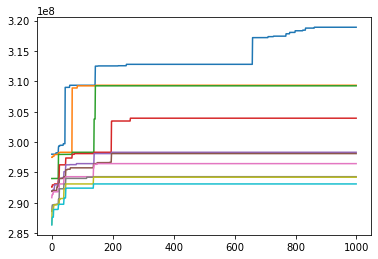

In [46]:
import matplotlib.pyplot as plt
import numpy as np
    
for i in range(len(y_plot_list)):
    plt.plot(x_plot_list, y_plot_list[i])

plt.show()

In [47]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 110443.11512374878 seconds ---


In [48]:
import pickle

with open('era-solution/era_output-3-40', 'wb') as fp:
    pickle.dump(result, fp)
with open('era-solution/era_xplot-3-40', 'wb') as fp:
    pickle.dump(x_plot_list, fp)
with open('era-solution/era_yplot-3-40', 'wb') as fp:
    pickle.dump(y_plot_list, fp)
with open('era-solution/era_splot-3-40', 'wb') as fp:
    pickle.dump(var_s_plot_list, fp)
with open('era-solution/era_aplot-3-40', 'wb') as fp:
    pickle.dump(var_a_plot_list, fp)   
with open('era-solution/era_bplot-3-40', 'wb') as fp:
    pickle.dump(var_b_plot_list, fp)   

In [49]:
with open('era-solution/era_output-3-40', 'rb') as fp:
    read_result = pickle.load(fp)
    
print(read_result)

[[0, 20, Timestamp('2020-11-20 16:36:59+0000', tz='UTC'), Timestamp('2020-11-21 06:10:59+0000', tz='UTC'), 47, 0.133], [1, 23, Timestamp('2020-11-20 16:38:35+0000', tz='UTC'), Timestamp('2020-11-21 05:59:37+0000', tz='UTC'), 47, 0.133], [2, 24, Timestamp('2020-11-20 16:43:20+0000', tz='UTC'), Timestamp('2020-11-21 05:39:18+0000', tz='UTC'), 47, 0.133], [3, 21, Timestamp('2020-11-20 17:14:59+0000', tz='UTC'), Timestamp('2020-11-21 05:44:59+0000', tz='UTC'), 47, 0.133], [4, 26, Timestamp('2020-11-20 18:18:48+0000', tz='UTC'), Timestamp('2020-11-21 04:10:12+0000', tz='UTC'), 49, 0.14], [5, 11, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 45, 0.171], [6, 18, Timestamp('2020-11-20 19:24:04+0000', tz='UTC'), Timestamp('2020-11-21 02:19:29+0000', tz='UTC'), 71, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'),

In [50]:
with open('era-solution/era_yplot-3-40', 'rb') as fp:
    read_yplot = pickle.load(fp)
    
print(read_yplot)

[[298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298229468.58410066, 298229468.58410066, 298229468.58410066, 298229468.58410066, 298229468.58410066, 298229468.58410066, 298229468.58410066, 298229468.58410066, 299168472.02610075, 299357203.02610075, 299357203.02610075, 299357203.02610075, 299357203.02610075, 299470517.70610064, 299470517.70610064, 299470517.70610064, 299470517.70610064, 299470517.70610064, 299470517.70610064, 299470517.70610064, 299470517.70610064, 299470517.70610064, 299470517.70610064, 299470517.70610064, 299727876.38610065, 299727876.38610065, 299727876.38610065, 299727876.38610065, 299727876.38610065, 299727876.38610065, 308999941.06610066, 308999941.06610066, 308999941.06610066, 308999941.06610066, 308999941.06610066, 308999941.06610066, 308999941.06

In [51]:
with open('era-solution/era_output-3-40', 'rb') as fp:
    read_result = pickle.load(fp)
    print(countFitness(read_result))
    
# print(read_result)

[318890840.9361007, 5180, 28292822, 40]
